In [5]:
#@title Imports + defaults settings.
#%load_ext autoreload
#%autoreload 2

import haiku as hk
import jax
import jax.numpy as jnp
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import optax
import os
import warnings
import importlib

warnings.filterwarnings("ignore")

try:
    from google.colab import files
    _ON_COLAB = True
except:
    _ON_COLAB = False

import rnn_utils
import bandits
import disrnn
import hybrnn
import plotting
import rat_data

from scipy.io import loadmat

In [67]:
agent = bandits.DynamicAgentQ(alpha=0.5, beta=5.0, lambda_uu=0.6, lambda_eu=0.3,
                      kappa_uu=0.5, kappa_eu=0.02)

#@title Set up environment
env_contingencies = [0.9,0.9] # probability of reward in the likely reward side
env_flip_freq = [30,60,90] # contingency flip frequencies
n_actions = 2
#environment = bandits.EnvironmentBanditsFlipsFreq(block_flip_freq=env_flip_freq, reward_probs=env_contingencies) #, predif_sequence = [2,1,0,1,0,0,0,1,1])
environment = bandits.EnvironmentBanditsFlipsFreq(block_flip_freq=env_flip_freq, reward_probs=env_contingencies)


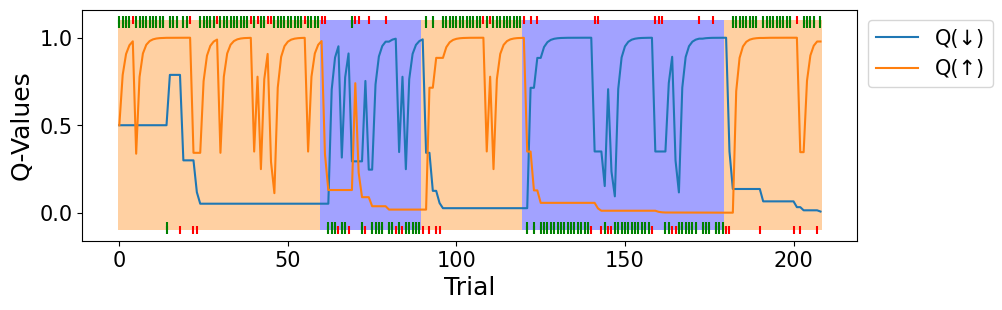

In [68]:
experiment = bandits.run_flip_experiment(agent=agent,
                   environment=environment,
                   n_trials=209)

# Plot agent Q-values
ax = bandits.plot_session(
    choices=experiment.choices,
    rewards=experiment.rewards,
    timeseries=experiment.second_timeseries,
    timeseriesb=experiment.timeseries,
    timeseries_name='Q-Values',
    labels = [f'Q({"↓" if a == 0 else "↑"})' for a in range(n_actions)])

